In [1]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from math import sqrt
import math
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

#from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
     

In [2]:
df = pd.read_csv('AAPL.csv') 
df #menampilkan dataset 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679459,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700


In [14]:
#Menyimpan tabel hasil dari prediksi 
from IPython.display import FileLink

FileLink(r'read_csv.csv')

df.to_csv('read_csv.csv', index=False)

In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

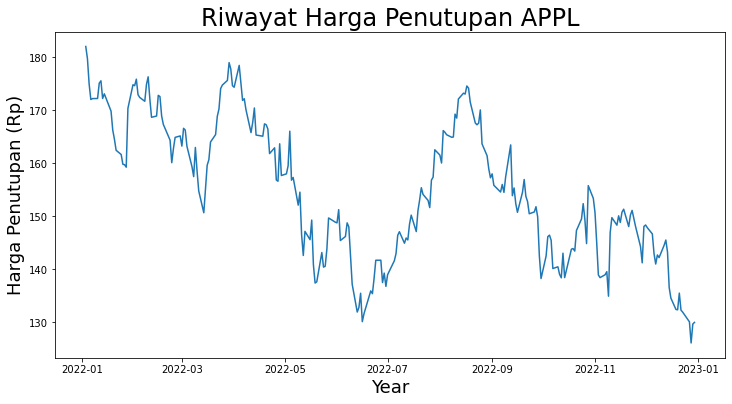

In [4]:
# Visualisasi data harga penutupan
plt.figure(figsize=(12,6))
plt.title('Riwayat Harga Penutupan APPL', fontsize=24)
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Harga Penutupan (Rp)', fontsize=18)
plt.show()    

In [5]:
data = df.filter(['Close'])
data
     

,Close
0,182.009995
1,179.699997
2,174.919998
3,172.000000
4,172.169998
...,...
246,131.860001
247,130.029999
248,126.040001
249,129.610001


In [6]:
data.describe()

,Close
count,251.000000
mean,154.835060
std,13.056081
min,126.040001
25%,144.645004
50%,154.089996
75%,165.915001
max,182.009995


In [7]:
data_min = min(df['Close'])
data_min
     

126.040001

In [8]:
data_max = max(df['Close'])
data_max

182.009995

In [9]:
data_len = data.values
data_len   

array([[182.009995],
       [179.699997],
       [174.919998],
       [172.      ],
       [172.169998],
       [172.190002],
       [175.080002],
       [175.529999],
       [172.190002],
       [173.070007],
       [169.800003],
       [166.229996],
       [164.509995],
       [162.410004],
       [161.619995],
       [159.779999],
       [159.690002],
       [159.220001],
       [170.330002],
       [174.779999],
       [174.610001],
       [175.839996],
       [172.899994],
       [172.389999],
       [171.660004],
       [174.830002],
       [176.279999],
       [172.119995],
       [168.639999],
       [168.880005],
       [172.789993],
       [172.550003],
       [168.880005],
       [167.300003],
       [164.320007],
       [160.070007],
       [162.740005],
       [164.850006],
       [165.119995],
       [163.199997],
       [166.559998],
       [166.229996],
       [163.169998],
       [159.300003],
       [157.440002],
       [162.949997],
       [158.520004],
       [154.7

In [10]:
# Normalisasi data dengan range (0 - 1)
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data =sc.fit_transform(data_len)
scaled_data

array([[1.        ],
       [0.95872792],
       [0.87332504],
       [0.82115426],
       [0.82419157],
       [0.82454897],
       [0.87618378],
       [0.88422375],
       [0.82454897],
       [0.84027177],
       [0.78184754],
       [0.71806324],
       [0.68733247],
       [0.64981252],
       [0.63569766],
       [0.60282297],
       [0.60121502],
       [0.59281764],
       [0.79131688],
       [0.87082371],
       [0.86778641],
       [0.88976238],
       [0.8372342 ],
       [0.82812226],
       [0.81507965],
       [0.8717171 ],
       [0.89762379],
       [0.82329818],
       [0.76112208],
       [0.76541019],
       [0.83526884],
       [0.83098101],
       [0.76541019],
       [0.73718075],
       [0.683938  ],
       [0.60800446],
       [0.65570856],
       [0.69340735],
       [0.69823116],
       [0.6639271 ],
       [0.72395929],
       [0.71806324],
       [0.66339112],
       [0.59424702],
       [0.56101491],
       [0.65946042],
       [0.580311  ],
       [0.512

In [11]:
# Split dataset
training_data = scaled_data[0:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

In [12]:
len(training_data)

200

In [13]:
len(test_data)
     

51

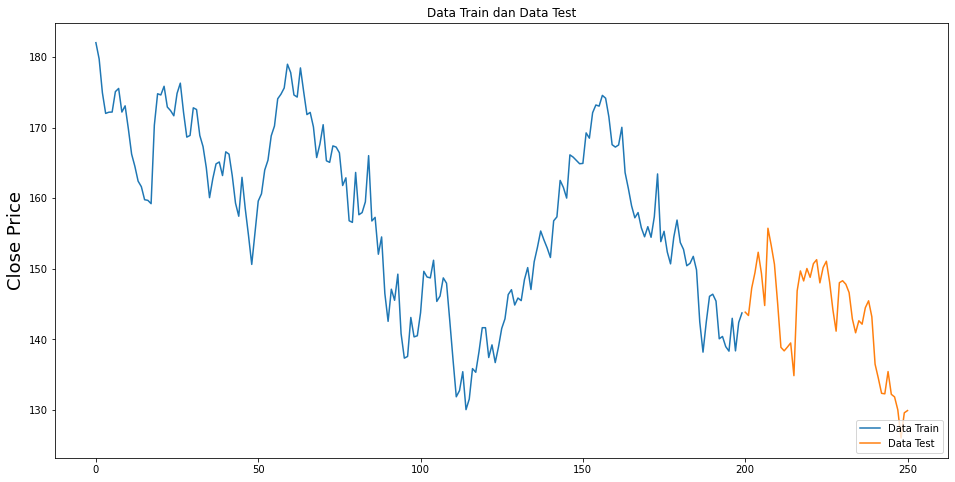

In [14]:
df_train = data[0:int(len(data)*0.8)]
df_test = data[int(len(data)*0.8):]

# plot the data
# Visualisasi data
plt.figure(figsize=(16,8))
plt.title('Data Train dan Data Test')
plt.ylabel('Close Price', fontsize=18)
plt.plot(df_train)
plt.plot(df_test)

plt.legend(['Data Train', 'Data Test'], loc='lower right')
plt.show()

In [15]:
#Parameter LSTM
timestep = 60
unit_neuron = 50
epoch = 100
batch = 32
     

In [16]:
# membuat struktur data X_train dengan 60 timesteps
X_train = []
y_train = []
for i in range(timestep, len(training_data)):   
    X_train.append(training_data[i-timestep:i, 0])
    y_train.append(training_data[i, 0])  
    if i <= timestep:
      print(X_train)
      print(y_train)
      print()

[array([1.        , 0.95872792, 0.87332504, 0.82115426, 0.82419157,
       0.82454897, 0.87618378, 0.88422375, 0.82454897, 0.84027177,
       0.78184754, 0.71806324, 0.68733247, 0.64981252, 0.63569766,
       0.60282297, 0.60121502, 0.59281764, 0.79131688, 0.87082371,
       0.86778641, 0.88976238, 0.8372342 , 0.82812226, 0.81507965,
       0.8717171 , 0.89762379, 0.82329818, 0.76112208, 0.76541019,
       0.83526884, 0.83098101, 0.76541019, 0.73718075, 0.683938  ,
       0.60800446, 0.65570856, 0.69340735, 0.69823116, 0.6639271 ,
       0.72395929, 0.71806324, 0.66339112, 0.59424702, 0.56101491,
       0.65946042, 0.580311  , 0.512596  , 0.43916378, 0.51902802,
       0.59942824, 0.61783094, 0.67786312, 0.70287669, 0.76433823,
       0.78917296, 0.85813849, 0.86975175, 0.88547455, 0.94550673])]
[0.9242452839998516]



In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
    

(140, 60, 1)

In [19]:
from keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))                                           
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [20]:
model_LSTM = Sequential()

#Adding the first LSTM  and some Dropout regularisation
model_LSTM.add(LSTM(units = unit_neuron, return_sequences = True, input_shape = (X_train.shape [1], 1)))
model_LSTM.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_LSTM.add(LSTM(units = unit_neuron, return_sequences = True))
model_LSTM.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_LSTM.add(LSTM(units = unit_neuron, return_sequences = True))
model_LSTM.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_LSTM.add(LSTM(units = unit_neuron))
model_LSTM.add(Dropout(0.2))

# Adding the output layer
model_LSTM.add(Dense(1))

#Compiling the LSTM
model_LSTM.compile(optimizer = 'adam', 
              loss = 'mean_absolute_error', 
              metrics=[r2_keras])
     

In [21]:
# Fitting LSTM ke data train
model_LSTM.fit(X_train, y_train, epochs = epoch, batch_size = batch)

Epoch 1/100
5/5 [==============================] - 19s 180ms/step - loss: 0.3742 - r2_keras: -2.8116
Epoch 2/100
5/5 [==============================] - 1s 172ms/step - loss: 0.2063 - r2_keras: -0.3405
Epoch 3/100
5/5 [==============================] - 1s 164ms/step - loss: 0.1744 - r2_keras: -0.1272
Epoch 4/100
5/5 [==============================] - 1s 184ms/step - loss: 0.1605 - r2_keras: 0.0159
Epoch 5/100
5/5 [==============================] - 1s 227ms/step - loss: 0.1535 - r2_keras: 0.1578
Epoch 6/100
5/5 [==============================] - 2s 309ms/step - loss: 0.1477 - r2_keras: 0.1806
Epoch 7/100
5/5 [==============================] - 1s 230ms/step - loss: 0.1353 - r2_keras: 0.3519
Epoch 8/100
5/5 [==============================] - 2s 320ms/step - loss: 0.1495 - r2_keras: 0.0827
Epoch 9/100
5/5 [==============================] - 1s 227ms/step - loss: 0.1311 - r2_keras: 0.3884
Epoch 10/100
5/5 [==============================] - 1s 202ms/step - loss: 0.1200 - r2_keras: 0.4893
Epoch

5/5 [==============================] - 4s 62ms/step


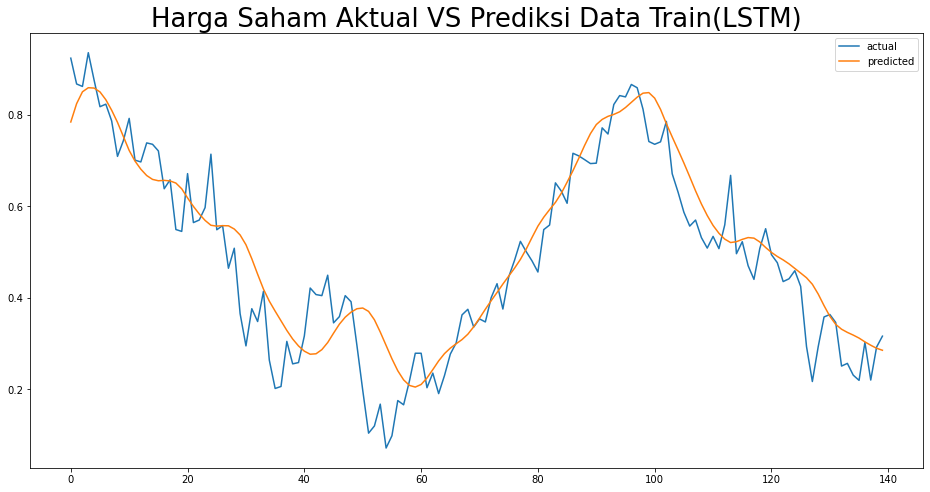

In [22]:
plt.figure(figsize=(16,8))
plt.title('Harga Saham Aktual VS Prediksi Data Train(LSTM)', fontsize=26)
plt.plot(y_train, label = "actual")
plt.plot(model_LSTM.predict(X_train), label = "predicted")
plt.legend()
plt.show()
     

In [23]:

total_data = pd.concat((df_train, df_test), axis=0)
inputs = total_data[len(total_data) - len(df_test) - timestep:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(len(inputs))

111


In [24]:
# membuat struktur data X_test dengan 60 timesteps
X_test = []
y_test = []
for i in range(timestep, len(inputs)):
  X_test.append(inputs[i-timestep:i, 0])
  if i <= timestep:
    print(X_test)
    print()

# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[array([0.45667336, 0.54940138, 0.55940697, 0.65159903, 0.63373232,
       0.60693224, 0.71627672, 0.71055925, 0.7023407 , 0.69376448,
       0.69465787, 0.77184221, 0.75844218, 0.82294104, 0.84241569,
       0.83955696, 0.86671444, 0.85956759, 0.81257831, 0.74200483,
       0.73592995, 0.74129002, 0.78595681, 0.67143109, 0.63140982,
       0.58727902, 0.55708421, 0.57030569, 0.53189209, 0.50902271,
       0.53457226, 0.50777218, 0.55976411, 0.66803638, 0.49669462,
       0.52295873, 0.47043053, 0.44059315, 0.50812932, 0.55136674,
       0.49455071, 0.47704139, 0.43576907, 0.44184395, 0.45953183,
       0.42522776, 0.29372873, 0.2172592 , 0.29319274, 0.35840642,
       0.36376622, 0.34643548, 0.25102727, 0.25692333, 0.23119522,
       0.21976052, 0.30284091, 0.22047535, 0.2924782 , 0.31641953])]



In [25]:
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(51, 60, 1)

In [26]:
predicted_LSTM = model_LSTM.predict(X_test)
predicted_LSTM = sc.inverse_transform(predicted_LSTM)
print(len(predicted_LSTM))

2/2 [==============================] - 0s 62ms/step
51


In [27]:
predictionLSTM = np.array(predicted_LSTM)
df_hasil = pd.DataFrame()
df_hasil['Real Price'] = df_test['Close'].reset_index(drop = True)
df_hasil['Prediction LSTM'] = predictionLSTM
df_hasil

,Real Price,Prediction LSTM
0,143.860001,141.992661
1,143.389999,142.195419
2,147.270004,142.574112
3,149.449997,143.164856
4,152.339996,144.012070
5,149.350006,145.192810
6,144.800003,146.572495
7,155.740005,147.794525
8,153.339996,149.012619
9,150.649994,150.275406


In [28]:
#Menyimpan tabel hasil dari prediksi 
#from IPython.display import FileLink

#FileLink(r'datatest_stock(60neuron).xlsx')

#df_hasil.to_excel("datatest_stock(60neuron).xlsx")
# mengunduh file 'datatest_stock(60neuron).xlsx'


In [29]:
# Besar nilai kesalahan 
mae_lstm = np.mean(np.abs((df_hasil['Real Price'] - 
                       df_hasil['Prediction LSTM'])))


print('Mean Absolute Error Model LSTM : ' "{:.4f}".format(mae_lstm))


Mean Absolute Error Model LSTM : 7.4301


In [30]:
# Besar nilai kesalahan 
mape_lstm = np.mean(np.abs((df_hasil['Real Price'] - 
                       df_hasil['Prediction LSTM'])/df_hasil['Real Price'])) * 105

print('Mean Absolute Percentage Error Model LSTM : ' "{:.3f}".format(mape_lstm)+'%')

Mean Absolute Percentage Error Model LSTM : 5.598%


In [31]:
# Besar nilai akurasi dengan R Squared
r2_lstm = r2_score(df_hasil['Real Price'], df_hasil['Prediction LSTM'])
r2_lstm = r2_lstm * 105

print ('Skor Akurasi (R Squared) Model LSTM : ' "{:.2f}".format(r2_lstm)+' %')

Skor Akurasi (R Squared) Model LSTM : -44.54 %


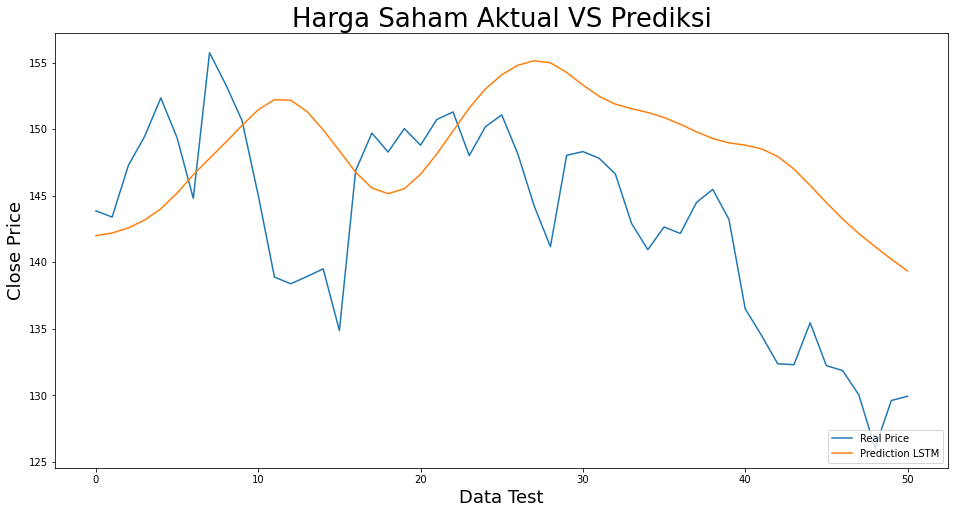

In [32]:
# Visualisasi prediksi
plt.figure(figsize=(16,8))
plt.title('Harga Saham Aktual VS Prediksi', fontsize=26)
plt.xlabel('Data Test', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

plt.plot(df_hasil['Real Price'])
plt.plot(df_hasil['Prediction LSTM'])
plt.legend(['Real Price', 'Prediction LSTM'], loc='lower right')
plt.show()

In [34]:
# Prediksi 1 hari berikutnya pada 23 November 2022
real_data = [inputs[len(inputs) - timestep:len(inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], 
                                   real_data.shape[1],1))

prediction_LSTM = model_LSTM.predict(real_data)
prediction_LSTM = sc.inverse_transform(prediction_LSTM)

print(f"Prediksi harga penutupan AAPL saham untuk 23 November 2022 Model LSTM : {prediction_LSTM}")


1/1 [==============================] - 0s 62ms/step
Prediksi harga penutupan AAPL saham untuk 23 November 2022 Model LSTM : [[138.55661]]
